### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data: 

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64
 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a Deep Learning model capable to predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.

In this excersice you will be requested to create a total of three models and select the most performant one.


### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 2) Load Data

- You will be provided with a cvs (comma separated value) file.
- You will need to add that file into a pandas dataframe, you can use the following code as reference
- The file will be available in canvas

In [2]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### 3) Review you data:

Make sure you review your data.
Place special attention of null or empty values.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 4. Remove the columns not needed for Student performance prediction

- Choose only the columns you consider to be valuable for your model training.
- For example, StudentID might not be a good feature for your model, and thus should be removed from your main dataset, which other columns should also be removed?
- You can name that final dataset as 'dataset'

In [4]:
# Your code here
# Eliminar las columnas no necesarias
dataset = data.drop(['StudentID', 'Ethnicity', 'Gender'], axis=1)

# Visualizar el nuevo dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   ParentalEducation  2392 non-null   int64  
 2   StudyTimeWeekly    2392 non-null   float64
 3   Absences           2392 non-null   int64  
 4   Tutoring           2392 non-null   int64  
 5   ParentalSupport    2392 non-null   int64  
 6   Extracurricular    2392 non-null   int64  
 7   Sports             2392 non-null   int64  
 8   Music              2392 non-null   int64  
 9   Volunteering       2392 non-null   int64  
 10  GPA                2392 non-null   float64
 11  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 224.4 KB


### 5. Check if the columns has any null values:
- Here you now have your final dataset to use in your model training.
- Before moving foward review your data check for any null or empty value that might be needed to be removed

In [8]:
# Your code here
# Revisar si hay valores nulos en el dataset final
null_values = dataset.isnull().sum()

# Mostrar las columnas que tienen valores nulos
print(null_values[null_values > 0])
# Eliminar filas con valores nulos
dataset_cleaned = dataset.dropna()


Series([], dtype: int64)


### 6. Prepare your data for training and for testing set:
 - First create a dataset named X, with all columns but GPA. These are the features
 - Next create another dataset named y, with only GPA column. This is the label
 - If you go to your Imports, you will see the following import: **'from sklearn.model_selection import train_test_split'**
 - Use that *train_test_split* function to create: X_train, X_test, y_train and y_test respectively. Use X and y datasets as parameters. Other parameters to use are: Test Size = 0.2, Random State = 42.
 
 - Standarize your features (X_train and X_test) by using the StandardScaler (investigate how to use fit_transform and transform functions). This will help the training process by dealing with normilized data.

 Note: Your X_train shape should be around (1913, 10). This means the dataset has 10 columns which should be the input.

In [10]:

# Crear dataset X con todas las columnas excepto GPA
X = dataset.drop('GPA', axis=1)

# Crear dataset y con solo la columna GPA
y = dataset['GPA']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de entrenamiento
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Estandarizar los datos
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Solo transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)

# Verificar las nuevas formas después de la estandarización
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


X_train shape: (1913, 11)
X_test shape: (479, 11)
y_train shape: (1913,)
y_test shape: (479,)
X_train_scaled shape: (1913, 11)
X_test_scaled shape: (479, 11)


### 7. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention of 10 and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with 1 unit, do not define an activation function so it defaults to linear, suitable for regression tasks. e.g. Dense(1)

This last part of the output layer is super important, since we want to predict the GPA, this means that we want a regression and not a classification. Linear activation function is best for regression and Sigmoid is best for Binary Classification

In [11]:
# Your code here

# Asegurarnos de que el dataset tenga 11 columnas (eliminar solo 'GPA')
X = dataset.drop('GPA', axis=1)

# Verificar la forma del dataset
print(f"Forma de X: {X.shape}")  # Debería ser (n_samples, 11)

# Crear el dataset y con la columna GPA
y = dataset['GPA']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la forma de los conjuntos
print(f"X_train shape: {X_train.shape}")  # Debe ser (1913, 11)
print(f"X_test shape: {X_test.shape}")

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Forma de X: (2392, 11)
X_train shape: (1913, 11)
X_test shape: (479, 11)


In [12]:
# Definir la red neuronal con 11 columnas de entrada
model = Sequential([
    Dense(64, activation='relu', input_dim=11),  # Capa de entrada con 11 características
    Dense(32, activation='relu'),                # Capa oculta con 32 unidades
    Dense(1)                                     # Capa de salida para predecir GPA
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Ver el resumen del modelo
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 8. Compile your Neural Network
- Choose Adam as the optimizer
- And MSE as the Loss function
- Also add the following metrics: Mean Absolute Error

In [14]:
# Your code here
# Compilar el modelo
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mae'])  # Añadiendo Mean Absolute Error como métrica

# Ver el resumen del modelo
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 9. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [16]:
# Your code here
# Ajustar (entrenar) el modelo
history = model.fit(X_train_scaled, y_train, 
                    epochs=50,  # Número de iteraciones
                    batch_size=10,  # Tamaño del lote
                    validation_split=0.2)  # Proporción de validación


Epoch 1/50
153/153 [==============================] - 0s 1ms/step - loss: 0.0126 - mae: 0.0882 - val_loss: 0.0578 - val_mae: 0.1912
Epoch 2/50
153/153 [==============================] - 0s 1ms/step - loss: 0.0131 - mae: 0.0912 - val_loss: 0.0516 - val_mae: 0.1818
Epoch 3/50
153/153 [==============================] - 0s 1ms/step - loss: 0.0119 - mae: 0.0865 - val_loss: 0.0513 - val_mae: 0.1780
Epoch 4/50
153/153 [==============================] - 0s 1ms/step - loss: 0.0115 - mae: 0.0847 - val_loss: 0.0511 - val_mae: 0.1793
Epoch 5/50
153/153 [==============================] - 0s 1ms/step - loss: 0.0120 - mae: 0.0871 - val_loss: 0.0519 - val_mae: 0.1803
Epoch 6/50
153/153 [==============================] - 0s 1ms/step - loss: 0.0121 - mae: 0.0865 - val_loss: 0.0502 - val_mae: 0.1810
Epoch 7/50
153/153 [==============================] - 0s 1ms/step - loss: 0.0121 - mae: 0.0861 - val_loss: 0.0504 - val_mae: 0.1786
Epoch 8/50
153/153 [==============================] - 0s 1ms/step - loss: 0.

### 10. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Training and Validation Loss over Epochs
- In a second graph:
   - Plot the Training MAE and the Validation MAE
   - X Label = Epochs
   - Y Label = Mean Absolute Error (MAE)
   - Title = Training and Validation MAE over Epochs

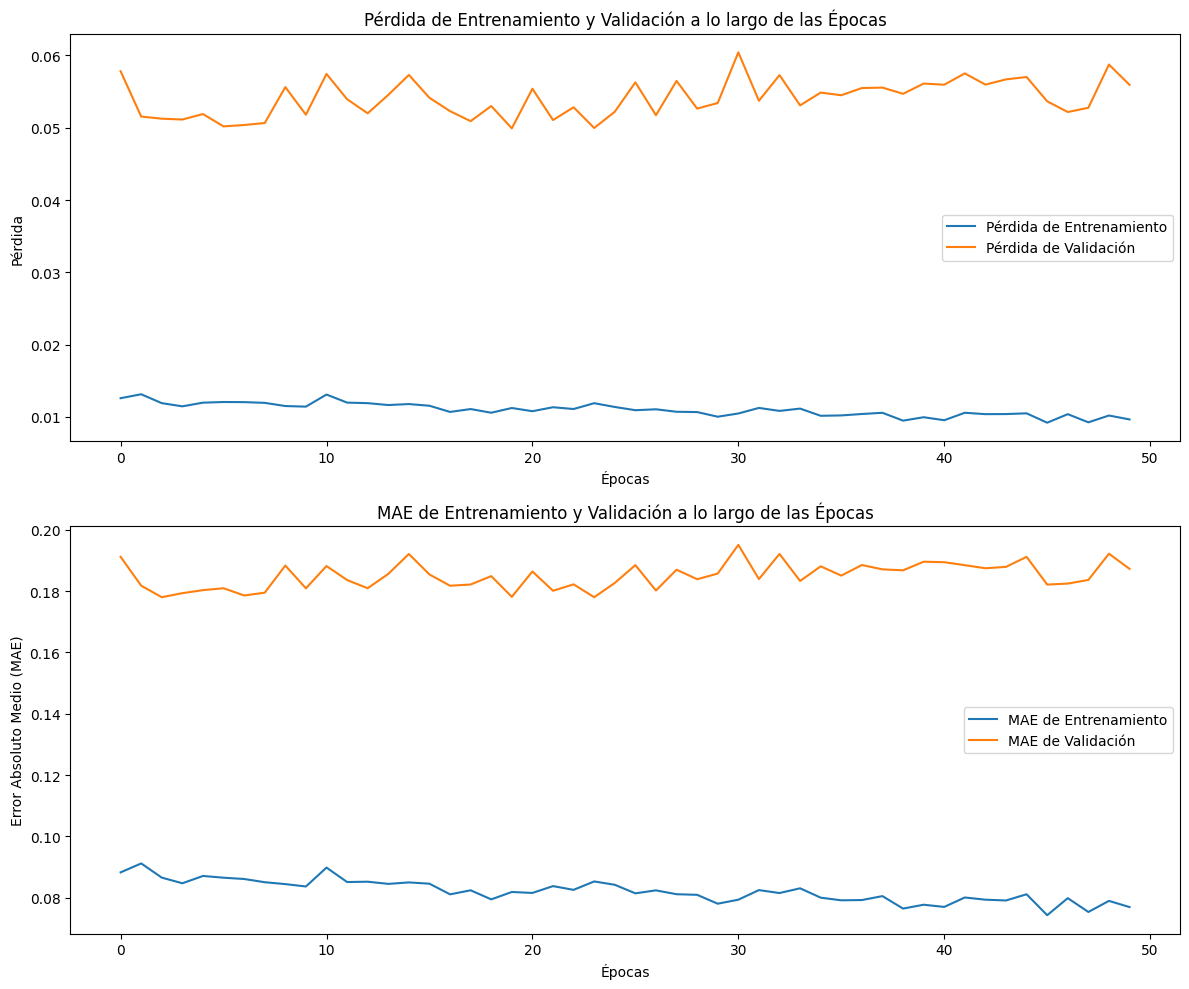

In [17]:
# Your code here

import matplotlib.pyplot as plt

# Crear una figura con dos subgráficas
plt.figure(figsize=(12, 10))

# Gráfico de Pérdida
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación a lo largo de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de MAE
plt.subplot(2, 1, 2)
plt.plot(history.history['mae'], label='MAE de Entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de Validación')
plt.title('MAE de Entrenamiento y Validación a lo largo de las Épocas')
plt.xlabel('Épocas')
plt.ylabel('Error Absoluto Medio (MAE)')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


### 11. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [18]:
# Your code here
# Evaluar el modelo en los datos de prueba
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)

# Mostrar los resultados
print(f'Pérdida en el conjunto de prueba (MSE): {test_loss:.4f}')
print(f'Mean Absolute Error en el conjunto de prueba: {test_mae:.4f}')


15/15 [==============================] - 0s 4ms/step - loss: 0.0609 - mae: 0.1958
Pérdida en el conjunto de prueba (MSE): 0.0609
Mean Absolute Error en el conjunto de prueba: 0.1958


### 12. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- How good was your model?

In [19]:
# Your code here
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Imprimir cada predicción y su valor real correspondiente
for i in range(len(predictions)):
    print(f'Predicción: {predictions[i][0]:.4f}, Valor real: {y_test.iloc[i]:.4f}')


15/15 [==============================] - 0s 929us/step
Predicción: 1.0820, Valor real: 1.4277
Predicción: 2.5511, Valor real: 3.1174
Predicción: 2.0181, Valor real: 2.0378
Predicción: 3.5673, Valor real: 3.5485
Predicción: 0.3052, Valor real: 0.2490
Predicción: 2.4661, Valor real: 2.6277
Predicción: 1.6685, Valor real: 2.0574
Predicción: 1.9477, Valor real: 2.2483
Predicción: 2.3738, Valor real: 2.1947
Predicción: 0.7949, Valor real: 0.7582
Predicción: 2.8214, Valor real: 2.3709
Predicción: 0.8118, Valor real: 0.7664
Predicción: 2.8332, Valor real: 2.9527
Predicción: 2.8572, Valor real: 2.3433
Predicción: 2.7904, Valor real: 2.7718
Predicción: 0.1960, Valor real: 0.2879
Predicción: 1.0544, Valor real: 1.0183
Predicción: 1.2697, Valor real: 1.6294
Predicción: 1.9268, Valor real: 2.0744
Predicción: 2.2825, Valor real: 2.4238
Predicción: 1.7835, Valor real: 1.7562
Predicción: 1.8218, Valor real: 1.5663
Predicción: 1.8149, Valor real: 1.7062
Predicción: 3.2487, Valor real: 3.1614
Predicció

### 13. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [20]:
# Your code here

# Eliminar la columna 'Volunteering'
dataset_model2 = dataset.drop(['Volunteering'], axis=1)

# Preparar los datos para el modelo
X_model2 = dataset_model2.drop('GPA', axis=1)
y_model2 = dataset_model2['GPA']

X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(X_model2, y_model2, test_size=0.2, random_state=42)

# Estandarizar las características
scaler_model2 = StandardScaler()
X_train_model2_scaled = scaler_model2.fit_transform(X_train_model2)
X_test_model2_scaled = scaler_model2.transform(X_test_model2)

# Definir el modelo
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train_model2.shape[1], activation='relu'))
model2.add(Dropout(0.2))  # Añadir Dropout
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1))  # Capa de salida

# Compilar el modelo
model2.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo
history_model2 = model2.fit(X_train_model2_scaled, y_train_model2, epochs=100, batch_size=10, validation_split=0.2)


Epoch 1/100
153/153 [==============================] - 1s 2ms/step - loss: 0.8256 - mae: 0.6502 - val_loss: 0.1341 - val_mae: 0.2985
Epoch 2/100
153/153 [==============================] - 0s 2ms/step - loss: 0.1650 - mae: 0.3220 - val_loss: 0.0810 - val_mae: 0.2307
Epoch 3/100
153/153 [==============================] - 0s 1ms/step - loss: 0.1207 - mae: 0.2803 - val_loss: 0.0618 - val_mae: 0.1996
Epoch 4/100
153/153 [==============================] - 0s 1ms/step - loss: 0.1012 - mae: 0.2517 - val_loss: 0.0524 - val_mae: 0.1912
Epoch 5/100
153/153 [==============================] - 0s 1ms/step - loss: 0.0889 - mae: 0.2392 - val_loss: 0.0563 - val_mae: 0.1968
Epoch 6/100
153/153 [==============================] - 0s 1ms/step - loss: 0.0870 - mae: 0.2335 - val_loss: 0.0775 - val_mae: 0.2319
Epoch 7/100
153/153 [==============================] - 0s 1ms/step - loss: 0.0727 - mae: 0.2139 - val_loss: 0.0668 - val_mae: 0.2115
Epoch 8/100
153/153 [==============================] - 0s 1ms/step - 

#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [21]:
# Your code here
# Crear nuevas características
dataset['Study_Tutoring_Interaction'] = dataset['StudyTimeWeekly'] * dataset['Tutoring']

# Preparar los datos para el modelo
X_model3 = dataset.drop('GPA', axis=1)
y_model3 = dataset['GPA']

X_train_model3, X_test_model3, y_train_model3, y_test_model3 = train_test_split(X_model3, y_model3, test_size=0.2, random_state=42)

# Estandarizar las características
scaler_model3 = StandardScaler()
X_train_model3_scaled = scaler_model3.fit_transform(X_train_model3)
X_test_model3_scaled = scaler_model3.transform(X_test_model3)

# Definir el modelo
model3 = Sequential()
model3.add(Dense(128, input_dim=X_train_model3.shape[1], activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(1))  # Capa de salida

# Compilar el modelo
model3.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo
history_model3 = model3.fit(X_train_model3_scaled, y_train_model3, epochs=150, batch_size=10, validation_split=0.2)


Epoch 1/150
153/153 [==============================] - 1s 2ms/step - loss: 1.1500 - mae: 0.8837 - val_loss: 0.5327 - val_mae: 0.6129
Epoch 2/150
153/153 [==============================] - 0s 1ms/step - loss: 0.3717 - mae: 0.5089 - val_loss: 0.3088 - val_mae: 0.4575
Epoch 3/150
153/153 [==============================] - 0s 2ms/step - loss: 0.2432 - mae: 0.4045 - val_loss: 0.2351 - val_mae: 0.3965
Epoch 4/150
153/153 [==============================] - 0s 1ms/step - loss: 0.1919 - mae: 0.3531 - val_loss: 0.1982 - val_mae: 0.3637
Epoch 5/150
153/153 [==============================] - 0s 1ms/step - loss: 0.1643 - mae: 0.3243 - val_loss: 0.1761 - val_mae: 0.3423
Epoch 6/150
153/153 [==============================] - 0s 1ms/step - loss: 0.1467 - mae: 0.3057 - val_loss: 0.1603 - val_mae: 0.3260
Epoch 7/150
153/153 [==============================] - 0s 1ms/step - loss: 0.1341 - mae: 0.2920 - val_loss: 0.1478 - val_mae: 0.3126
Epoch 8/150
153/153 [==============================] - 0s 1ms/step - 

In [22]:
# Evaluar Modelo 1
test_loss_1, test_mae_1 = model.evaluate(X_test_scaled, y_test)

# Evaluar Modelo 2
test_loss_2, test_mae_2 = model2.evaluate(X_test_model2_scaled, y_test_model2)

# Evaluar Modelo 3
test_loss_3, test_mae_3 = model3.evaluate(X_test_model3_scaled, y_test_model3)

# Mostrar resultados
print(f'Modelo 1 - Pérdida: {test_loss_1:.4f}, MAE: {test_mae_1:.4f}')
print(f'Modelo 2 - Pérdida: {test_loss_2:.4f}, MAE: {test_mae_2:.4f}')
print(f'Modelo 3 - Pérdida: {test_loss_3:.4f}, MAE: {test_mae_3:.4f}')


15/15 [==============================] - 0s 1ms/step - loss: 0.0546 - mae: 0.1849
Modelo 1 - Pérdida: 0.0609, MAE: 0.1958
Modelo 2 - Pérdida: 0.0416, MAE: 0.1569
Modelo 3 - Pérdida: 0.0546, MAE: 0.1849


Tiene la menor pérdida (0.0416) y el menor MAE (0.1569), lo que indica que este modelo tiene un mejor rendimiento en comparación con los otros dos. Esto sugiere que el modelo se ajusta mejor a los datos y realiza predicciones más precisas.


Dataset Data Engineering:
Se eliminó la columna Volunteering, ya que podría no tener un impacto significativo en la predicción del GPA.

Model Definition:
Se añadió una capa de Dropout para ayudar a prevenir el sobreajuste.
Se aumentó el número de unidades en la capa oculta a 64.

Model Compile:
Se cambió el optimizador a RMSprop.

Model Training:
Se aumentó el número de épocas a 100.